In [36]:
%pylab inline
import numpy as np
import numpy.random as rand
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import random as rng
import seaborn as sns
import pickle
import argparse
import pandas as pd 
import pickle
sns.set_style('ticks')

Populating the interactive namespace from numpy and matplotlib


/home/lansdell/conda-envs/tfnightly/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'rand']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [49]:
#Variable alpha
fn_in = 'cifar10_conv_np_hyperparam_search_varalpha.npz'

#Fixed alpha
fn_in = 'cifar10_conv_np_hyperparam_search.npz'

#Fixed alpha higher beta
#fn_in = 'cifar10_conv_np_higherbeta_hyperparam_search.npz'

with open(fn_in, 'rb') as f:
    data = pickle.load(f)
    
params = data['params']
testaccs = data['test_accs']
N = 100
#Have to reshape..... idiot
testaccs = np.array(testaccs).reshape((-1,N))

array([0.52584135, 0.50911458, 0.62169471, 0.6181891 , 0.67487981,
       0.61207933, 0.46183894, 0.41215946, 0.65835337, 0.37680288,
       0.62790465, 0.61989183, 0.53525641, 0.66426282, 0.59815705,
       0.52003205, 0.41646635, 0.64282853, 0.57211538, 0.41075721,
       0.68259215, 0.38591747])

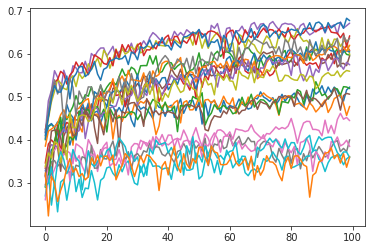

In [50]:
plt.plot(testaccs.T)
np.max(testaccs,1)

In [62]:
#Variable alpha
fn_in = 'cifar10_conv_np_hyperparam_search_varalpha.npz'

#Fixed alpha
#fn_in = 'cifar10_conv_np_hyperparam_search.npz'

#Fixed alpha higher beta
#fn_in = 'cifar10_conv_np_higherbeta_hyperparam_search.npz'

with open(fn_in, 'rb') as f:
    data = pickle.load(f)
    
params = data['params']
testaccs = data['test_accs']
N = 100
#Have to reshape..... idiot
testaccs = np.array(testaccs).reshape((-1,N))

array([0.41025641, 0.64923878, 0.67097356, 0.5483774 , 0.4770633 ,
       0.69781651, 0.37690304, 0.3432492 , 0.17658253, 0.61678686,
       0.69561298, 0.68289263, 0.71384215, 0.37530048, 0.52043269,
       0.48557692, 0.48116987, 0.50330529, 0.56810897, 0.66165865,
       0.50160256, 0.33723958, 0.52554087])

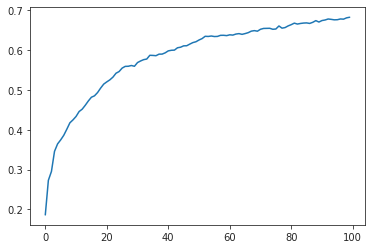

In [90]:
plt.plot(testaccs.T[:,11])
np.max(testaccs,1)

# 12 [max]
# 9: 0.6..
## 11: 0.7
# 16 0.5
# 17

In [88]:
params[12]

[0.010985883885766204, 2.273120078497619e-05, 1.6268828555811508e-06]

In [89]:
params[11]

[0.018197016403362028, 7.143622800277263e-06, 6.240101364987091e-05]

In [53]:
#Variable alpha
#fn_in = 'cifar10_conv_np_hyperparam_search_varalpha.npz'

#Fixed alpha
#fn_in = 'cifar10_conv_np_hyperparam_search.npz'

#Fixed alpha higher beta
fn_in = 'cifar10_conv_np_higherbeta_hyperparam_search.npz'

with open(fn_in, 'rb') as f:
    data = pickle.load(f)
    
params = data['params']
testaccs = data['test_accs']
N = 100
#Have to reshape..... idiot
testaccs = np.array(testaccs).reshape((-1,N))

array([0.28094952, 0.2275641 , 0.21714744, 0.44591346, 0.48367388,
       0.56710737, 0.32101362, 0.6098758 , 0.6968149 , 0.37109375,
       0.24939904, 0.24769631, 0.32171474, 0.35186298, 0.49859776,
       0.51572516, 0.5932492 , 0.45512821, 0.16366186, 0.17077324,
       0.55939503])

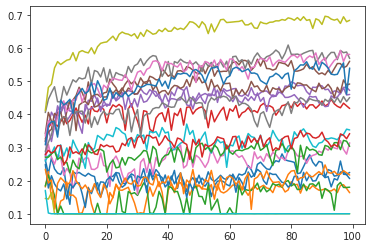

In [54]:
plt.plot(testaccs.T)
np.max(testaccs,1)